<p><img height="45px" src="https://drive.google.com/uc?id=1aJx1i5ecv6L6R5zUqK_ry6vuDnBDmprd"align="left" hspace="10px" vspace="0px"></p>

<h1>  PROYECTO FINAL DE LA MATERIA "ANALISIS DE DATOS"  </h1>
<br>

World Cycling es una empresa multinacional dedicada a la venta de todo lo relacionado con el deporte del ciclismo. Esta empresa cuenta con varias sucursales distribuidas en distintos países y su stock de artículos de venta se relaciona con bicicletas, indumentaria y accesorios. La empresa enfrenta el desafío de comprender qué factores determinan la rentabilidad de sus ventas, ya que desconoce qué componentes clave (demográficos, geográficos o relacionados con los productos) tienen mayor impacto en el margen de ganancia por venta. La falta de claridad sobre qué elementos impulsan o reducen la rentabilidad limita la toma de decisiones estratégicas en áreas clave como marketing, ventas, compras y finanzas. Esta situación puede conducir a campañas mal dirigidas, precios ineficientes y una oferta de productos poco optimizada lo cual ocasiona una menor competitividad y pérdidas de oportunidades para maximizar beneficios. Identificar estos factores y desarrollar un modelo predictivo que clasifique transacciones como de alta o baja rentabilidad permitiría priorizar acciones en los segmentos más valiosos y optimizar tanto la oferta comercial como los recursos de la empresa.

El dataset suministrado por la empresa, cuenta con gran cantidad de variables y datos que reflejan el historico de ventas de la empresa y que nos pueden servir para cumplir con la pregunta SMART propuesta en este ejercicio.

PREGUNTA SMART ¿Cuáles de las variables del dataset, son mas influyentes en la rentabilidad de una venta, y cómo podemos construir un modelo predictivo en 3 meses para clasificar una transacción como de alta (>=40 %) o baja (<40 %) rentabilidad en base a esas características?

In [235]:
# Importamos las librerías
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import statistics as stat

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
# Import Linear Regression machine learning library
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import r2_score

1. PREPARACION DE LOS DATOS 

In [236]:
# Cargamso el dataset
url = 'bike data.csv'
data = pd.read_csv(url)
# Convertimos el dataset en dataframe
df = pd.DataFrame(data)

In [237]:
# Creamos la variable target y la rellenamos de acuerdo a los valores definidos en la pregunta SMART
# porcentaje de RENTABILIDAD >= al 40% es 1 y < al 40% es 0

df['target'] = ((((df['Unit Price']-df['Unit Cost']) / df['Unit Cost']) * 100) >= 30).astype('int')
df["target"].value_counts()

target
1    105890
0      7146
Name: count, dtype: int64

In [238]:
# Visualizamos las 5 primeras filas del data set
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590,1
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590,1
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366,1
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188,1
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238,1


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   year              113036 non-null  int64  
 2   Customer ID       113036 non-null  int64  
 3   Customer Age      113036 non-null  int64  
 4   Age Group         113036 non-null  object 
 5   Customer Gender   113036 non-null  object 
 6   Country           113036 non-null  object 
 7   State             113036 non-null  object 
 8   Product Category  113036 non-null  object 
 9   Sub Category      113036 non-null  object 
 10  Product           113036 non-null  object 
 11  Frame Size        25982 non-null   float64
 12  Order Quantity    113036 non-null  int64  
 13  Unit Cost         113036 non-null  int64  
 14  Unit Price        113036 non-null  int64  
 15  Cost              113036 non-null  int64  
 16  Revenue           11

Nos podemos dar cuenta que existen valores faltantes en la columna "Frame Size"

In [240]:
# Verificamos la cantidad de valores numos en cada variable
df.isnull().sum()

Date                    0
year                    0
Customer ID             0
Customer Age            0
Age Group               0
Customer Gender         0
Country                 0
State                   0
Product Category        0
Sub Category            0
Product                 0
Frame Size          87054
Order Quantity          0
Unit Cost               0
Unit Price              0
Cost                    0
Revenue                 0
Profit                  0
target                  0
dtype: int64

Confirmamos que la variable Frame Size tiene 87054 valores nulos. esto corresponde al 77 % del total de datos de la variable.

In [241]:
df["Frame Size"].describe()

count    25982.000000
mean        47.313063
std          6.860797
min         38.000000
25%         42.000000
50%         46.000000
75%         52.000000
max         62.000000
Name: Frame Size, dtype: float64

La variable "Frame Size" hace referencia a la talla de los marcos de bicicletas que se venden en la tienda. por ello de que exsita gran cantidad de valores nulos o faltantes, por ello, y porque no es una variable relevante para la clasificacion de rentabilidad. se toma la desicion de eliminar la columna. 

In [242]:
# Eliminamos la columna Frame Size
df = df.drop("Frame Size", axis=1)

In [243]:
# Verificamos las filas duplicadas 
# Verificar cuáles filas son duplicadas
duplicados = df.duplicated()

# Ver el número total de filas duplicadas
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Para ver las filas duplicadas (si quieres visualizarlas)
filas_duplicadas = df[duplicados]
print("\nLas filas duplicadas son:")
filas_duplicadas

Número de filas duplicadas: 1000

Las filas duplicadas son:


,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
1021,12/19/2013,2013,28931,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,531,1245,714,1
1091,9/30/2015,2015,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,40,20,1
1093,10/24/2013,2013,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,16,8,1
1095,10/24/2015,2015,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,8,4,1
1193,1/15/2016,2016,11248,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,28,57,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2/18/2014,2014,26499,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,1482,2336,854,1
111031,2/18/2016,2016,26499,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,1482,2336,854,1
111265,4/27/2014,2014,27295,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,1482,1860,378,1
111953,9/20/2013,2013,29256,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,461,735,274,1


se hace una revision de las filas que aparecen como duplicadas y se confirma que corresponden a la misma venta. 
por tanto, se eliminan

In [244]:
df = df.drop_duplicates()

Se elimina la columna Customer Age ya que existe otra variable que agrupa las edades.
y tambien se elimina Customer ID ya que es una variable que codifica al usuario y no es necesaria en el analisis

In [245]:
# Eliminamos la columna Frame Size
df = df.drop(["Customer Age", "Customer ID"], axis=1)

Se cambia la variable Date que contiene la fecha completa de la compra y se sustituye por una variable "month" que solo tendra el mes. se hace esto porque el año ya lo tenemos en otra variable y el dia de la compra no es importante en el analisis.

In [246]:
# Convertir la columna 'date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extraer el mes como número (1 = enero, 12 = diciembre)
df['month'] = df['Date'].dt.month

# Si ya no quieres conservar la columna original:
df = df.drop(columns=['Date'])

# Reordenamos columnas para que month quede primero
cols = ['month'] + [col for col in df.columns if col != 'month']
df = df[cols]

Ahora procedemos a separar las variables numericas de las variables categoricas

In [247]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Age Group', 'Customer Gender', 'Country', 'State', 'Product Category',
       'Sub Category', 'Product'],
      dtype='object')

In [248]:
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features

Index(['month', 'year', 'Order Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue', 'Profit', 'target'],
      dtype='object')

In [249]:
df.describe()

,month,year,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,6.453390,2014.400925,11.904254,267.819603,453.850628,471.103333,757.138527,286.035194,0.936244
std,3.478344,1.273327,9.564877,550.218722,922.751848,886.971635,1312.061623,454.852634,0.244319
min,1.000000,2011.000000,1.000000,1.000000,2.000000,1.000000,2.000000,-30.000000,0.000000
25%,4.000000,2013.000000,2.000000,2.000000,5.000000,28.000000,64.000000,29.000000,1.000000
50%,6.000000,2014.000000,10.000000,9.000000,25.000000,112.000000,226.000000,103.000000,1.000000
75%,10.000000,2016.000000,20.000000,42.000000,70.000000,442.000000,806.000000,360.000000,1.000000
max,12.000000,2016.000000,32.000000,2171.000000,3578.000000,42978.000000,58074.000000,15096.000000,1.000000


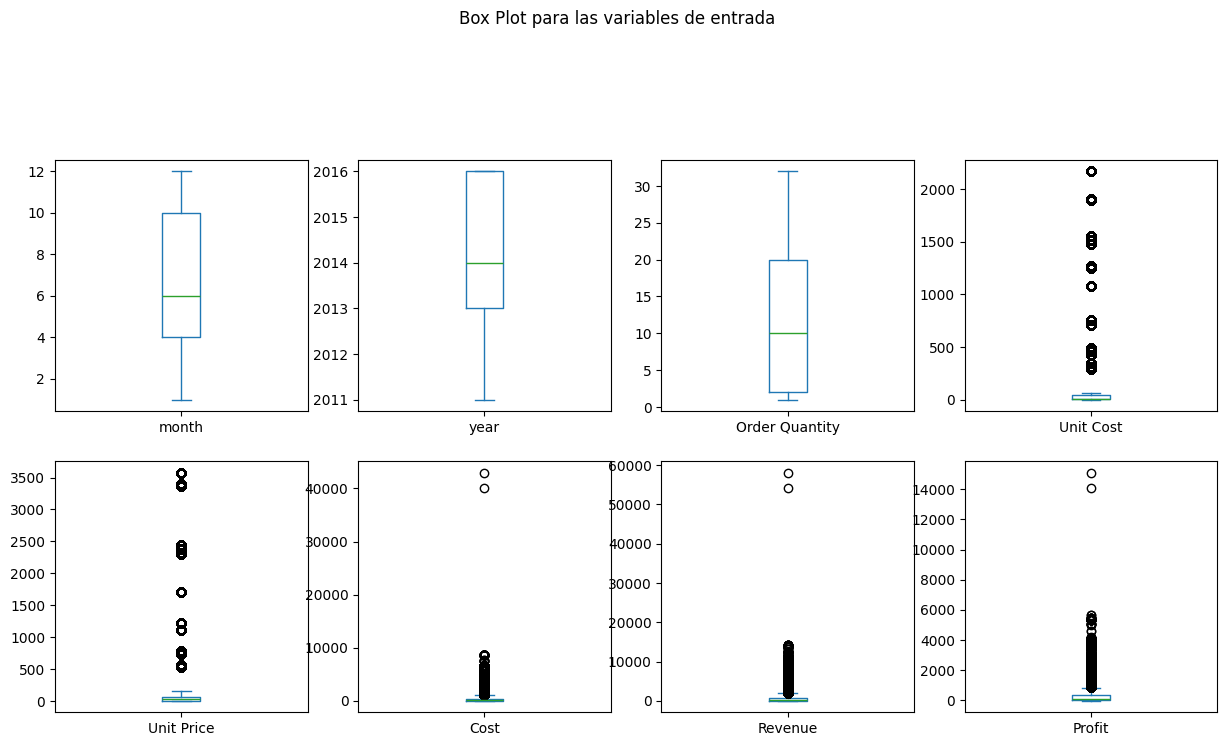

In [250]:
df.drop('target', axis=1).plot(kind='box', subplots=True, layout=(4, 4), sharex=False,
                               sharey=False, figsize=(15, 15), title='Box Plot para las variables de entrada')
plt.show()

Observamos que en varias columnas existe variaciones muy altas entre el valor minimo y el maximo. tambien que la mediana esta muy alejada de la media. se procede a investigar a que corresponden o si son valores erroneos o atipicos.

Se analizarán los valores de la columna Unit Cost 

In [251]:
df["Unit Cost"].describe()

count    112036.000000
mean        267.819603
std         550.218722
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit Cost, dtype: float64

In [252]:
# Encontrar el índice de la fila con el valor máximo en 'Unit Cost'
indice_maximo = df['Unit Cost'].idxmax()

# Obtener y imprimir la fila completa usando el índice
fila_con_maximo = df.loc[indice_maximo]
print("La fila con el valor máximo en 'Unit Cost' es:")
print(fila_con_maximo)

La fila con el valor máximo en 'Unit Cost' es:
month                              2
year                            2012
Age Group             Adults (35-64)
Customer Gender                    M
Country                United States
State                     Washington
Product Category               Bikes
Sub Category              Road Bikes
Product             Road-150 Red, 48
Order Quantity                     2
Unit Cost                       2171
Unit Price                      3578
Cost                            4342
Revenue                         5582
Profit                          1240
target                             1
Name: 58158, dtype: object


Podemos concluir que los valores atipicos de la variables corresponden a valores de compra y venta de articulos costosos que maneja la tienda como bicicletas. por tal motivo se dejan para el analisis.

2. ANALISIS EXPLORATORIO DE LOS DATOS 

verificamos el porcentaje de los valores que toma la variable objetivo

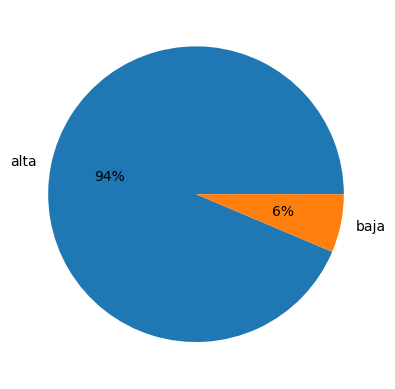

In [253]:
# verificamos grafica de valores de target
counts = [(df["target"] == 1).sum(), (df["target"] == 0).sum()]
plt.pie(counts, labels=["alta", "baja"], autopct='%.0f%%')
plt.show()

Graficamos la relacion entre las variables categorcias y la variable objetivo. para ver posibles 

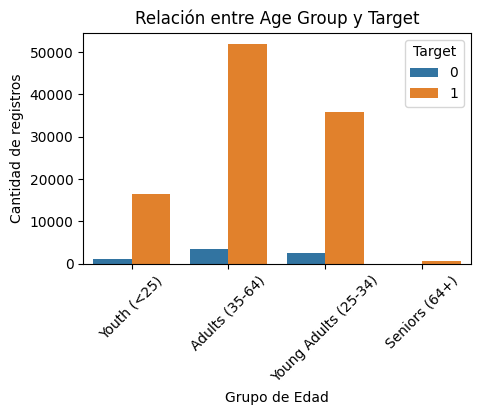

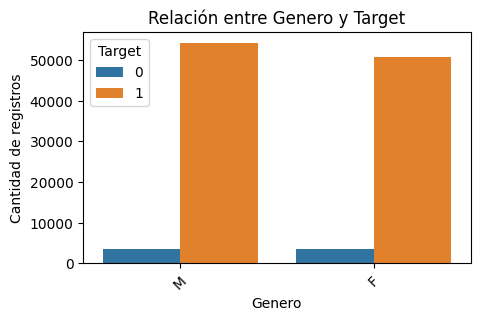

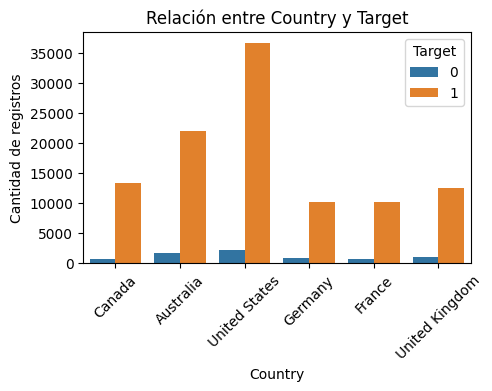

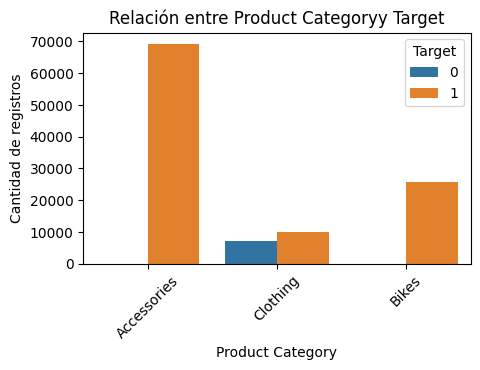

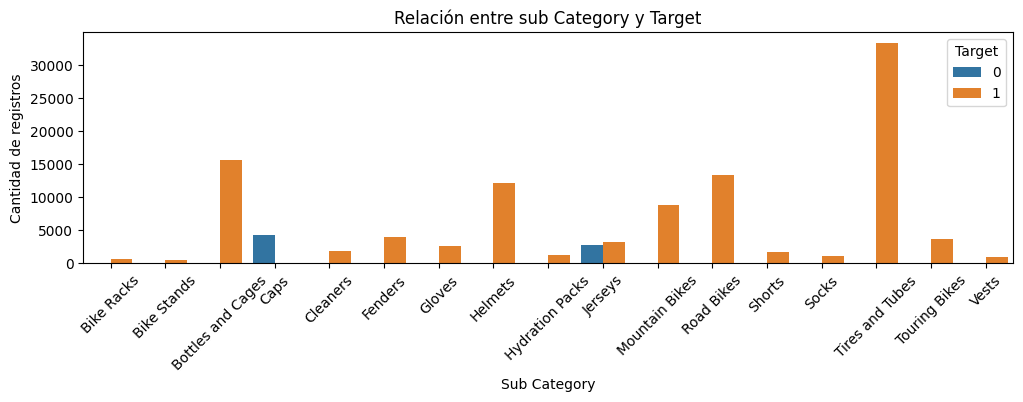

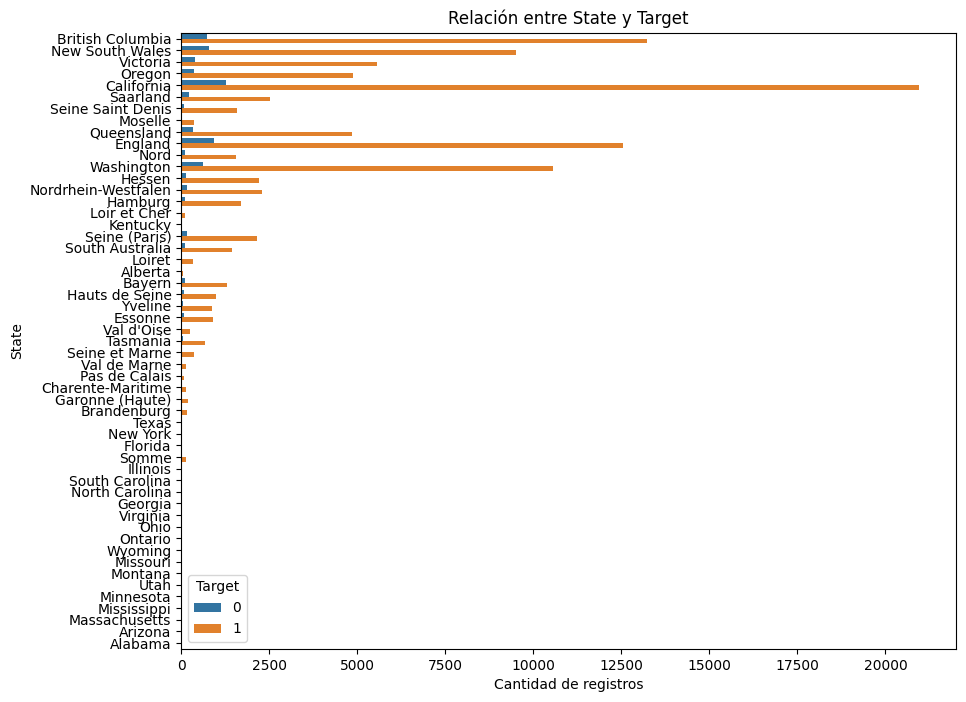

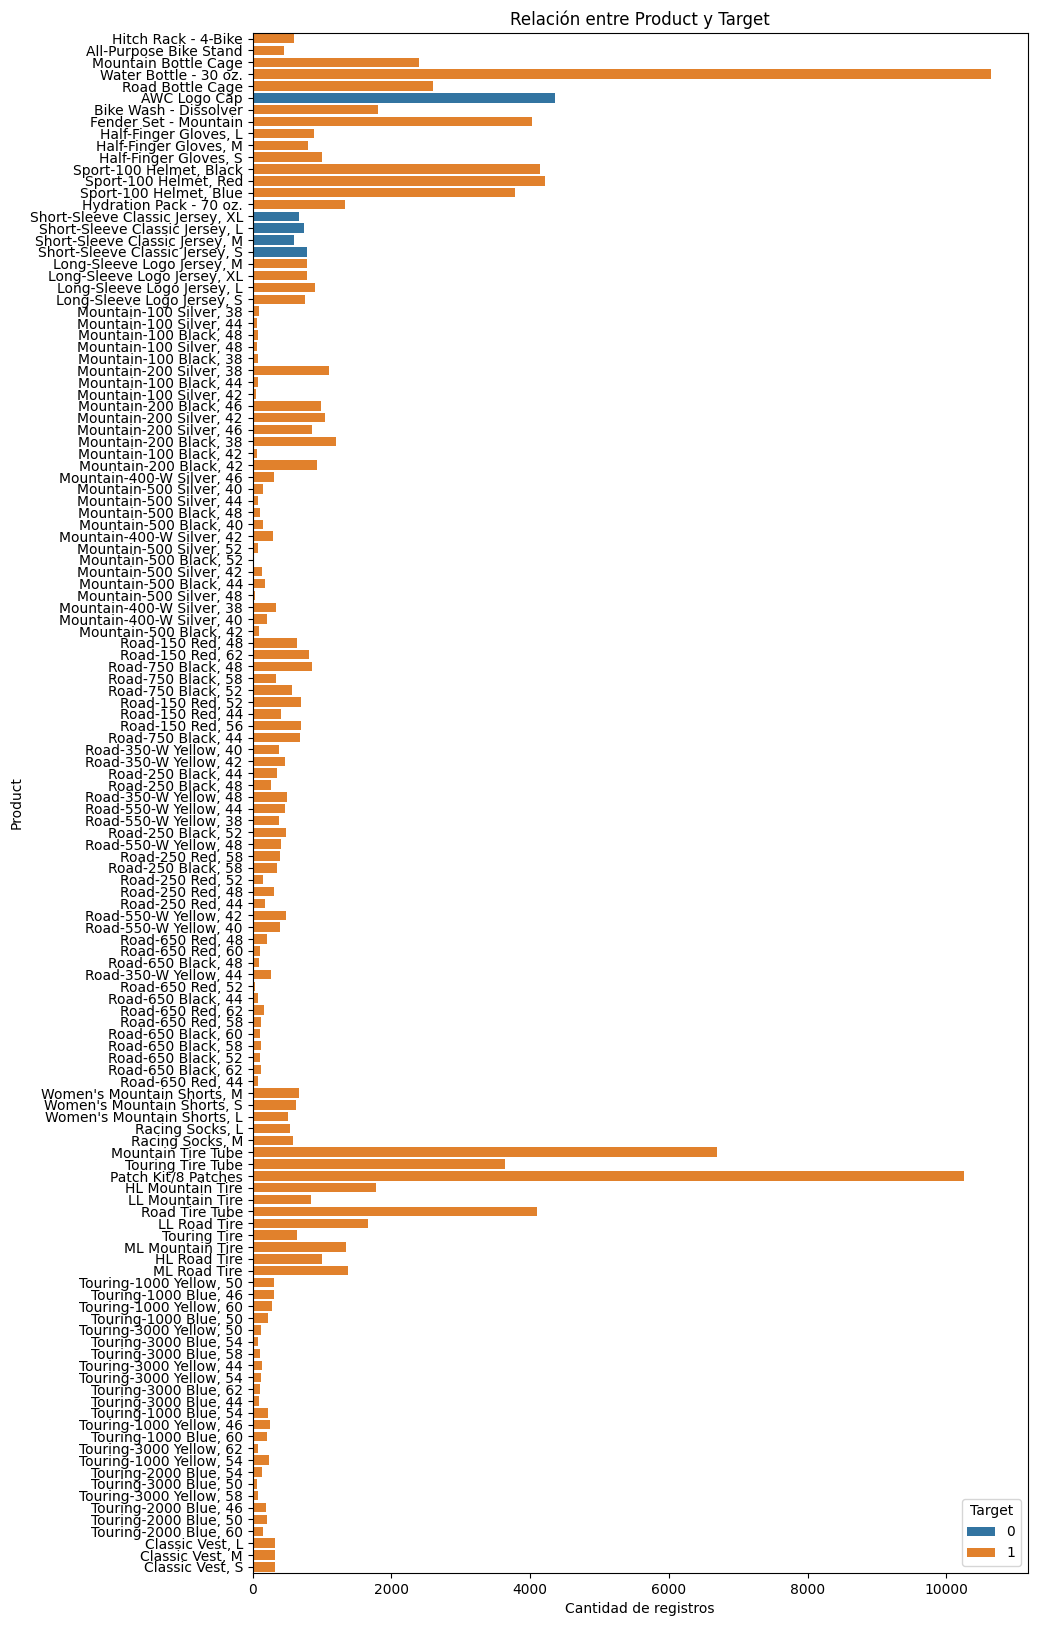

In [254]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Age Group", hue="target")
plt.title("Relación entre Age Group y Target")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de registros")
plt.legend(title="Target")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Customer Gender", hue="target")
plt.title("Relación entre Genero y Target")
plt.xlabel("Genero")
plt.ylabel("Cantidad de registros")
plt.legend(title="Target")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Country", hue="target")
plt.title("Relación entre Country y Target")
plt.xlabel("Country")
plt.ylabel("Cantidad de registros")
plt.legend(title="Target")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Product Category", hue="target")
plt.title("Relación entre Product Categoryy Target")
plt.xlabel("Product Category")
plt.ylabel("Cantidad de registros")
plt.legend(title="Target")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 3))
sns.countplot(data=df, x="Sub Category", hue="target")
plt.title("Relación entre sub Category y Target")
plt.xlabel("Sub Category")
plt.ylabel("Cantidad de registros")
plt.legend(title="Target")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, y="State", hue="target")
plt.title("Relación entre State y Target")
plt.ylabel("State")
plt.xlabel("Cantidad de registros")
plt.legend(title="Target")
plt.show()


plt.figure(figsize=(10, 20))
sns.countplot(data=df, y="Product", hue="target")
plt.title("Relación entre Product y Target")
plt.ylabel("Product")
plt.xlabel("Cantidad de registros")
plt.legend(title="Target")
plt.show()

De acuerdo con las graficas se puede observar que: las variables Product Category, Age Group y sub Category son relevantes a la hora de predecir la variable objetivo. las variables categoricas restantes se eliminan del dataset.

In [255]:
df = df.drop(["Customer Gender", "Country", "State", "Product"], axis=1)

Se realiza la codificacion de las variables categoricas 

codificamos de forma ordinal la columna **"Age Group**,  

In [256]:
age_order = {'Youth (<25)': 1, 'Young Adults (25-34)': 2,
             'Adults (35-64)': 3, 'Seniors (64+)': 4}
df['Age Group'] = df['Age Group'].map(age_order)

Utilizamos la codificación one-hot para las variables **"Product Category y Sub Category **

In [257]:
df = pd.get_dummies(df, columns=["Sub Category","Product Category"])

Realizamos analisis de correlacion entre variables numericas 

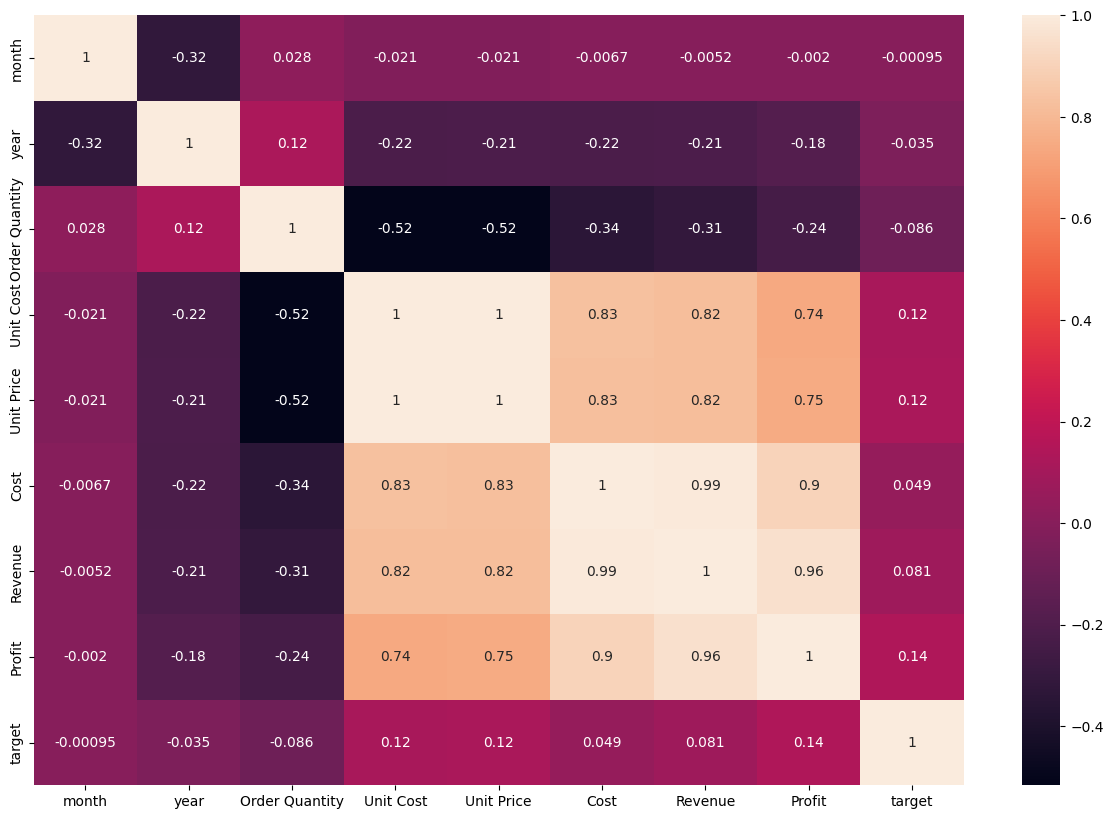

In [258]:
# Correlacion entre variables numericas 

corr = df[numerical_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()

Eliminamos variables que tienen una correlacion entre ellas y solo dejamos una que es la variable "Unit Cost"

In [259]:
df = df.drop(["Unit Price", "Revenue", "Profit", "Cost"], axis=1)

Cabe resaltar que de 18 variables predictoras iniciales, se llega a este punto solo con 7: "month", "year", "Age Group", "Product Category", "Sub Category",  "Order Quantity", "Unit Cost"

hacemos separacion de las variables predictoras y la variable objetivo

In [260]:
# separamos las vairables predictoras y la variable objetivo 
X = df.drop(["target"], axis=1)
y = df["target"]

SE DIVIDEN LOS GRUPOS DE ENTRENAMIENTO Y PRUEBA

In [261]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

SE ENTRENAN LOS MODELOS 

In [262]:
#modelo de regresion logistica basico
model1 = LogisticRegression(max_iter=2000)

# Entrenar el modelo 
model1.fit(X_train, y_train)

#hacer predicciones 
y_pred1 = model1.predict(X_test)

# metricas 
accuracy = accuracy_score(y_test, y_pred1)
conf_matriz = confusion_matrix(y_test, y_pred1)
class_report = classification_report(y_test, y_pred1)

print(f"Accuracy: {accuracy}")
print(conf_matriz)
print(class_report)


Accuracy: 0.9745626561942163
[[  859   570]
 [    0 20979]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75      1429
           1       0.97      1.00      0.99     20979

    accuracy                           0.97     22408
   macro avg       0.99      0.80      0.87     22408
weighted avg       0.98      0.97      0.97     22408



El modelo tiene un excelente desempeño en la clase mayoritaria 1. Sin embargo, tiene dificultades con la clase minoritaria 0, ya que tiene un recall bajo. Esto  por consecuencia directa del desbalance de la variable target 

In [263]:
# modelo de regresion logistica basico con Normalizacion y regularizacion Ridge
model2 = LogisticRegression(max_iter=2000)

# Normalizar las caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Entrenar el modelo
model2.fit(X_train_scaled, y_train)

# hacer predicciones
y_pred2 = model2.predict(X_test_scaled)

# metricas
accuracy = accuracy_score(y_test, y_pred2)
conf_matriz = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy}")
print(conf_matriz)
print(class_report)

Accuracy: 0.9751428061406641
[[ 1346    83]
 [  474 20505]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1429
           1       1.00      0.98      0.99     20979

    accuracy                           0.98     22408
   macro avg       0.87      0.96      0.91     22408
weighted avg       0.98      0.98      0.98     22408



la normalizacion de los datos (usando StandardScaler) mejoró bastante la detección de la clase minoritaria (0) puesto que el recall subio. a consecuencia la precisión de la clase 0 bajó a 0.74 (hay más falsos positivos).

CONCLUSIONES 
- el 94% de las ventas de la tienda tiene una rentabilidad alta. por tanto el dataset esta está muy desbalanceado hacia la clase 1.

- Al entrenar los dos modelos de clasifciacion, podemos concluir por sus metricas (precision y recall) que el modelo 2 es más útil en escenarios donde importa no perder los casos de clase 0, como si fueran ventas de baja rentabilidad que necesitamos identificar para tomar decisiones.

- Para mejorar el modelo de clasificacion, se tendrá que considerar técnicas de balanceo de clases (ej. SMOTE) para evitar que el modelo solo prediga la clase mayoritaria.

- la variable mas relevante para la clasificacion de la rentabilidad es "Sub Category" y es de esperarse por el gran surtido de la tienda y por las grandes diferencias de precio entre los articulos.